<a href="https://colab.research.google.com/github/akbism/case_studies/blob/main/2_Arya_Model_Training_and_Model_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Training and Inference <br><br>
**Arya.AI : Assignment - Data Scientist** <br>

**Submitted By:** <br> <br>
Amar Kumar

This is the script #2 for model training and inference.

**Task:**<br>
Binary Classification - Do an exploratory analysis of the dataset provided, decide on feature selection, preprocessing before training a model to classify as class ‘0’ or class ‘1’.

## Install important packages

In [ ]:
# Setting up the environment
!pip install pycaret --user
!pip install markupsafe==2.0.1
!pip install shap

# After installation of these packages, restart the runtime.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sou

## Import the packages

In [ ]:
# Reading all libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, matthews_corrcoef, roc_auc_score, roc_curve, plot_roc_curve, precision_recall_curve
from pycaret.classification import * 

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', True)
np.set_printoptions(precision=4, suppress=True)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
# Google drive
from google.colab import drive
drive.mount('/content/gdrive')
# Setting up the folder
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/Arya

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/Arya


## Reading the input dataset




In [ ]:
df= pd.read_csv('training_set.csv')
#Remove the junk column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

## Data Partioning - Training / Test

In [ ]:
train, val = train_test_split(df, test_size=0.2, random_state=42)

## Data cleaning

In [ ]:
# From the script#1, we have got the columns to drop.
less_5_non0 = ['X4', 'X22', 'X32', 'X34', 'X38', 'X41', 'X47', 'X48']
# From the script#1, we have got the 29 outliers
outlier = [3546, 3469, 2974, 370, 195, 1850, 2295, 2481, 3745, 1656, 2743, 3412, 3674, 2183, 308, 213, 3489, 2643, 2400, 3614, 2190, 1855, 3744, 1673, 3482, 1428, 2737, 2733, 3191, 1819, 1016, 2135]

In [ ]:
train = train[~train.index.isin(outlier)]
train = train.drop(less_5_non0, axis=1)
train

,X1,X2,X3,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X23,X24,X25,X26,X27,X28,X29,X30,X31,X33,X35,X36,X37,X39,X40,X42,X43,X44,X45,X46,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
247,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,20.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0.0,0.000,0.000,0.00,1.000,1,5,0
2958,0.0,0.00,1.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.26,0.00,0.00,0.00,2.53,5.06,2.53,0.0,3.79,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0.0,1.900,0.475,0.00,1.763,11,67,1
2968,0.0,0.23,0.47,1.18,0.00,0.23,0.00,0.70,0.70,0.0,0.47,0.23,0.00,0.00,0.23,0.70,0.00,2.83,0.0,1.89,0.00,0.47,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0.0,0.072,0.108,0.00,2.438,20,178,1
2676,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3.03,0.00,0.00,0.00,0.00,0.00,0.00,3.03,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0.0,0.473,0.000,0.00,1.687,5,27,0
2776,0.0,0.00,0.00,0.00,0.00,0.00,5.88,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0.0,0.000,0.000,0.00,1.000,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.84,0.0,0.84,0.00,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.69,0.0,0.134,0.0,0.000,0.000,0.00,1.285,5,27,0
1294,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.91,0.00,0.00,0.00,0.00,0.00,0.91,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.143,0.0,0.573,0.000,0.00,2.884,18,75,1
860,0.0,0.00,0.00,2.85,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.85,0.00,0.00,0.00,2.85,0.00,0.0,2.85,0.00,0.00,0.00,0.00,2.85,0.0,0.0,0.00,0.0,2.85,0.0,2.85,0.0,0.0,0.0,0.0,0.0,0.00,2.85,0.00,0.0,0.000,0.0,0.000,0.000,0.00,3.800,29,38,0
3507,0.5,0.40,0.33,0.13,0.03,0.13,0.10,0.54,0.77,0.3,0.70,0.54,1.14,0.03,0.27,0.43,0.03,3.20,0.0,1.45,0.37,0.60,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.06,0.00,0.0,0.071,0.0,0.456,0.500,0.11,6.049,129,2220,1


## Binary Classification experimentation environment set-up

In [ ]:
class_set_up = setup(data = train, target = 'Y', session_id = 123)

,Description,Value
0,session_id,123
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3096, 50)"
5,Missing Values,False
6,Numeric Features,49
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9478,0.9869,0.9317,0.9382,0.9345,0.8912,0.8918,0.222
et,Extra Trees Classifier,0.9469,0.9846,0.9190,0.9474,0.9326,0.8888,0.8896,0.560
rf,Random Forest Classifier,0.9418,0.9825,0.9110,0.9422,0.9259,0.8781,0.8789,0.664
gbc,Gradient Boosting Classifier,0.9405,0.9833,0.9075,0.9417,0.9239,0.8751,0.8759,0.618
ada,Ada Boost Classifier,0.9280,0.9730,0.8949,0.9225,0.9084,0.8491,0.8495,0.206
lr,Logistic Regression,0.9234,0.9676,0.8936,0.9135,0.9029,0.8397,0.8405,0.714
lda,Linear Discriminant Analysis,0.8966,0.9543,0.8103,0.9219,0.8614,0.7797,0.7849,0.029
dt,Decision Tree Classifier,0.8962,0.8942,0.8844,0.8609,0.8718,0.7846,0.7858,0.036
ridge,Ridge Classifier,0.8948,0.0000,0.8046,0.9224,0.8585,0.7755,0.7810,0.014
qda,Quadratic Discriminant Analysis,0.8186,0.9409,0.9526,0.7018,0.8079,0.6437,0.6712,0.020


In [ ]:
# LightGBM is the best model, hence it is selected for further processing
lightgbm_bin = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9585,0.9887,0.9186,0.9753,0.9461,0.9124,0.9135
1,0.9539,0.9896,0.9186,0.9634,0.9405,0.9029,0.9036
2,0.9631,0.9927,0.9770,0.9341,0.9551,0.9238,0.9245
3,0.9539,0.9895,0.9195,0.9639,0.9412,0.9033,0.9040
4,0.9447,0.9775,0.9655,0.9032,0.9333,0.8862,0.8876
5,0.9493,0.9855,0.9540,0.9222,0.9379,0.8951,0.8954
6,0.9263,0.9813,0.8851,0.9277,0.9059,0.8453,0.8460
7,0.9537,0.9906,0.9302,0.9524,0.9412,0.9030,0.9032
8,0.9398,0.9896,0.9070,0.9398,0.9231,0.8737,0.8740


In [ ]:
# Hyperparamater / fine tuning the model
tuned_lightgbm_bin = tune_model(lightgbm_bin)
print(tuned_lightgbm_bin)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9585,0.9909,0.9186,0.9753,0.9461,0.9124,0.9135
1,0.9355,0.9826,0.9070,0.9286,0.9176,0.8646,0.8648
2,0.9493,0.9921,0.9540,0.9222,0.9379,0.8951,0.8954
3,0.9539,0.9864,0.9310,0.9529,0.9419,0.9037,0.9039
4,0.9539,0.9798,0.9655,0.9231,0.9438,0.9048,0.9054
5,0.9401,0.9807,0.9080,0.9405,0.9240,0.8746,0.8749
6,0.9355,0.9811,0.9195,0.9195,0.9195,0.8657,0.8657
7,0.9537,0.9848,0.9186,0.9634,0.9405,0.9026,0.9033
8,0.9537,0.9845,0.9419,0.9419,0.9419,0.9034,0.9034


LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


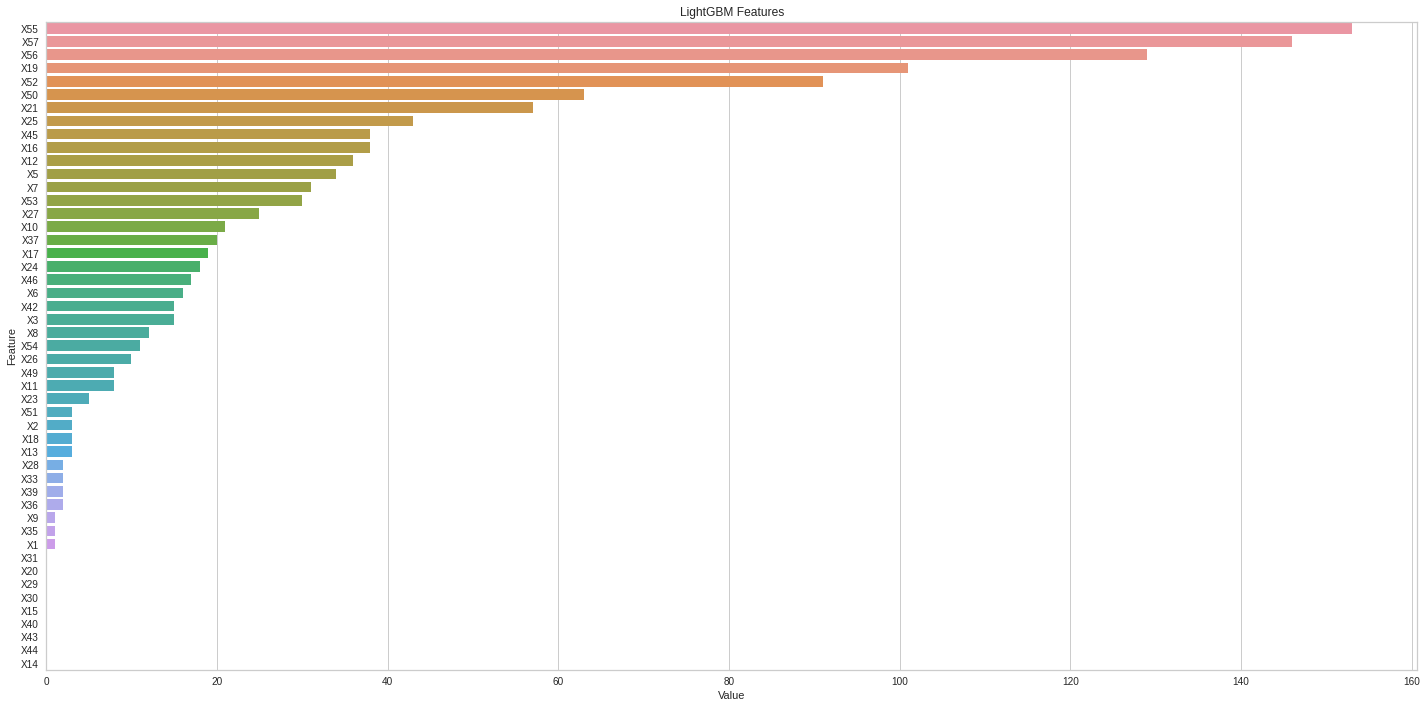

<Figure size 576x396 with 0 Axes>

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(tuned_lightgbm_bin.feature_importances_,train.columns[:-1])), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

## Prediction explaination

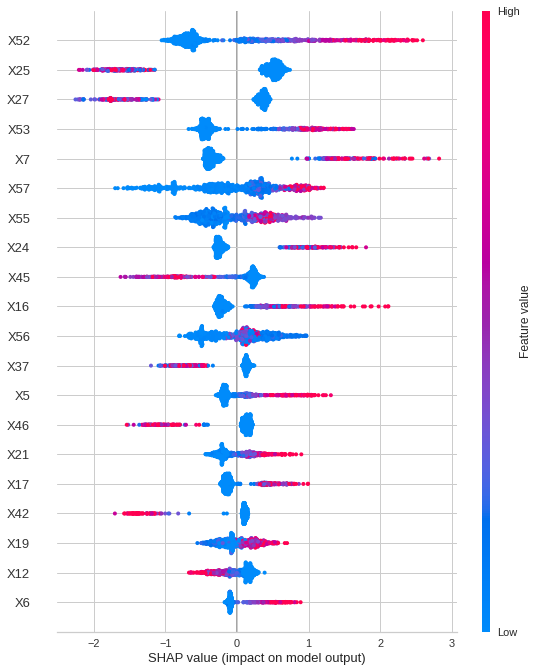

In [ ]:
interpret_model(tuned_lightgbm_bin)

## Final feature selection and re-training

In [ ]:
# Selecting the top features using elbow method
final_features= list(feature_imp.Feature.tail(31))
train=train[final_features+['Y']]

In [ ]:
# Setting up a new training environment with the fine-tuned features
class_set_up = setup(data = train, target = 'Y', session_id = 123)

,Description,Value
0,session_id,123
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3096, 32)"
5,Missing Values,False
6,Numeric Features,31
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9506,0.9871,0.9398,0.9379,0.9383,0.8971,0.8979,0.173
et,Extra Trees Classifier,0.9465,0.9840,0.9214,0.9437,0.9321,0.8879,0.8885,0.561
rf,Random Forest Classifier,0.9446,0.9832,0.9133,0.9465,0.9292,0.8838,0.8846,0.622
gbc,Gradient Boosting Classifier,0.9391,0.9836,0.9109,0.9352,0.9226,0.8724,0.8730,0.510
ada,Ada Boost Classifier,0.9354,0.9769,0.9075,0.9292,0.9180,0.8647,0.8652,0.187
lr,Logistic Regression,0.9252,0.9663,0.8936,0.9181,0.9051,0.8435,0.8444,0.411
dt,Decision Tree Classifier,0.8957,0.8942,0.8867,0.8583,0.8715,0.7838,0.7851,0.032
lda,Linear Discriminant Analysis,0.8869,0.9533,0.7815,0.9247,0.8461,0.7579,0.7655,0.033
ridge,Ridge Classifier,0.8851,0.0000,0.7769,0.9245,0.8432,0.7537,0.7618,0.017
qda,Quadratic Discriminant Analysis,0.8297,0.9506,0.9607,0.7141,0.8188,0.6650,0.6918,0.017


In [ ]:
# Again, the LightGBM is the best model, hence it is selected for further processing
lightgbm_bin = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9585,0.9917,0.9302,0.9639,0.9467,0.9128,0.9132
1,0.9585,0.9884,0.9302,0.9639,0.9467,0.9128,0.9132
2,0.9631,0.9918,0.9885,0.9247,0.9556,0.9241,0.9256
3,0.9539,0.9905,0.9195,0.9639,0.9412,0.9033,0.9040
4,0.9493,0.9778,0.9655,0.9130,0.9385,0.8955,0.8965
5,0.9493,0.9868,0.9425,0.9318,0.9371,0.8947,0.8947
6,0.9447,0.9805,0.9310,0.9310,0.9310,0.8849,0.8849
7,0.9491,0.9903,0.9070,0.9630,0.9341,0.8927,0.8937
8,0.9444,0.9885,0.9186,0.9405,0.9294,0.8836,0.8838


In [ ]:
# Hyperparamater / fine tuning the model
tuned_lightgbm_bin = tune_model(lightgbm_bin)
print(tuned_lightgbm_bin)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9447,0.9871,0.8837,0.9744,0.9268,0.8826,0.8853
1,0.9401,0.9879,0.9535,0.9011,0.9266,0.8760,0.8770
2,0.9401,0.9912,0.9310,0.9205,0.9257,0.8755,0.8756
3,0.9539,0.9865,0.9310,0.9529,0.9419,0.9037,0.9039
4,0.9493,0.9783,0.9540,0.9222,0.9379,0.8951,0.8954
5,0.9539,0.9834,0.9310,0.9529,0.9419,0.9037,0.9039
6,0.9309,0.9810,0.9080,0.9186,0.9133,0.8558,0.8559
7,0.9444,0.9828,0.8953,0.9625,0.9277,0.8827,0.8842
8,0.9398,0.9818,0.8953,0.9506,0.9222,0.8732,0.8742


LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


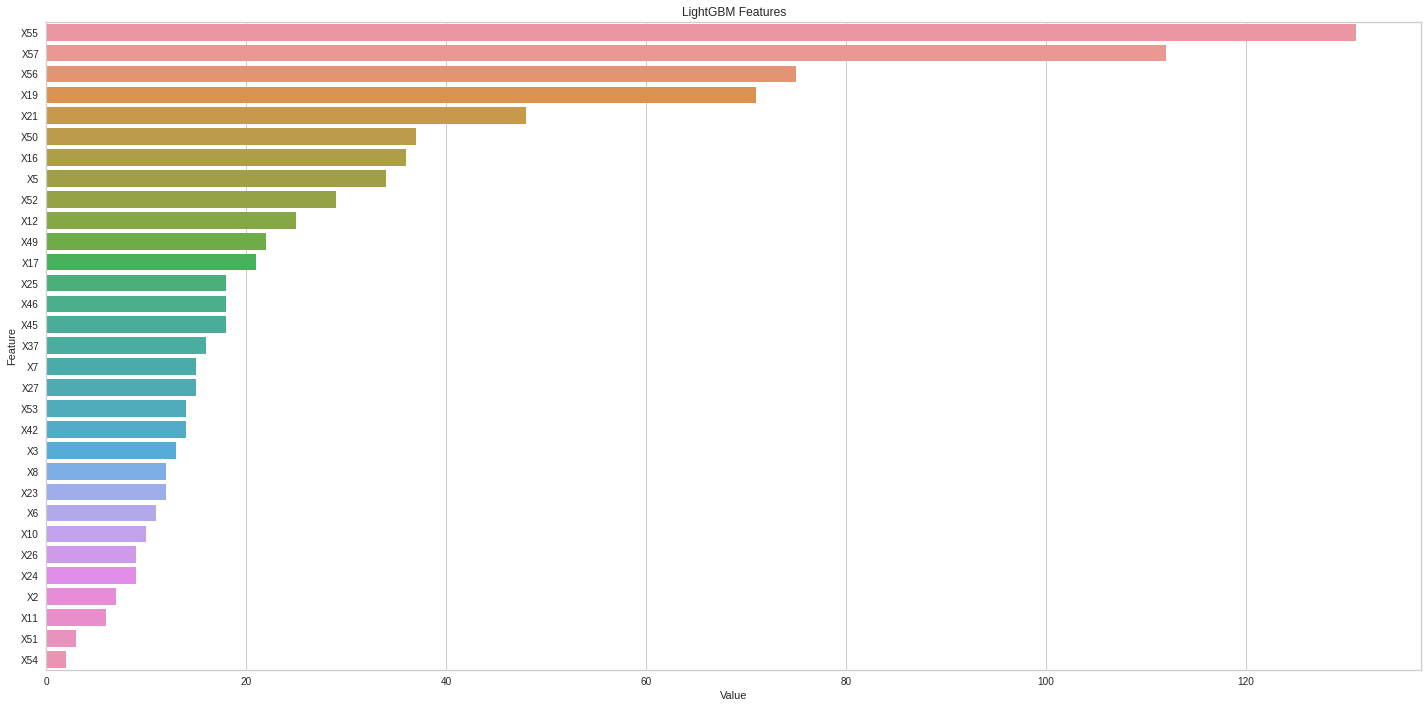

<Figure size 576x396 with 0 Axes>

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(tuned_lightgbm_bin.feature_importances_,train.columns[:-1])), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
plt.savefig('Final_lightgbm_importances-01.png')

## Model performance on the final GBC model

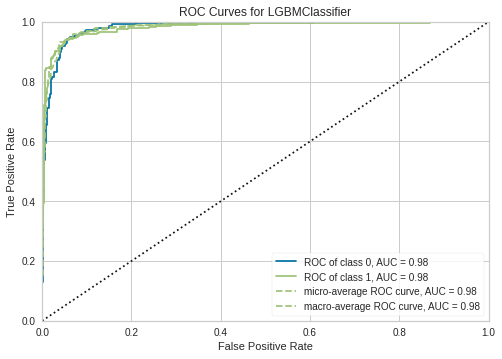

In [ ]:
plot_model(tuned_lightgbm_bin)

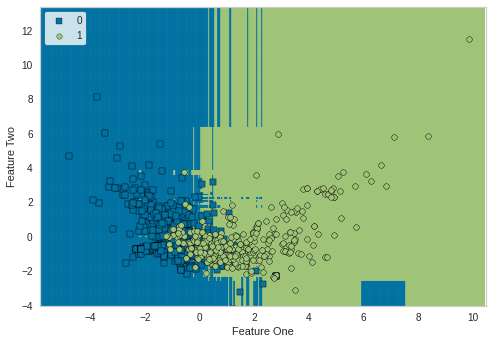

In [ ]:
plot_model(tuned_lightgbm_bin, plot='boundary')

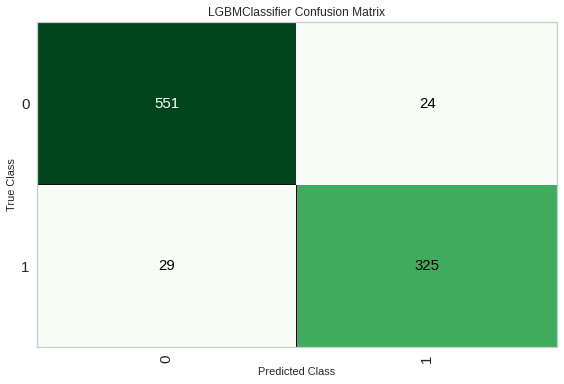

In [ ]:
# Model performance on the holdout dataset
plot_model(tuned_lightgbm_bin, plot = 'confusion_matrix')

In [ ]:
train_holdout = predict_model(tuned_lightgbm_bin)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9429,0.9821,0.9181,0.9312,0.9246,0.8787,0.8788


## Prepare the final model for deployment

In [ ]:
final_tuned_lightgbm_bin = finalize_model(tuned_lightgbm_bin)
# Save the model
# create an iterator object with write permission - model.pkl
with open('final_tuned_lightgbm_bin', 'wb') as files:
    pickle.dump(final_tuned_lightgbm_bin, files)

In [ ]:
with open('final_features', 'wb') as files:
    pickle.dump(train.columns[:-1], files)

## Model performance analysis on the validation dataset

In [ ]:
val=val[train.columns]

unseen_predictions = predict_model(final_tuned_lightgbm_bin, data=val)#, probability_threshold=0.1)
unseen_predictions['Score1'] = unseen_predictions.apply(lambda x: 1-x.Score if x.Label==0 else x.Score, axis=1)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.954,0.986,0.9256,0.9565,0.9408,0.9031,0.9035


,X2,X51,X23,X11,X49,X26,X54,X8,X3,X42,...,X50,X52,X19,X56,X57,X55,Y,Label,Score,Score1
2793,0.0,0.0,0.00,0.0,0.081,0.08,0.0,0.08,0.00,0.0,...,0.451,0.000,0.00,18,935,1.833,0,0,0.9983,0.0017
2803,0.0,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.0,...,0.000,0.000,0.00,9,29,3.222,0,0,0.9928,0.0072
2218,0.0,0.0,1.36,0.0,0.000,0.00,0.0,0.00,0.68,0.0,...,0.000,1.706,2.73,38,137,4.281,1,1,0.9843,0.9843
3111,0.0,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.0,...,0.150,0.000,1.78,15,37,1.850,0,0,0.9994,0.0006
3161,0.0,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.0,...,0.000,0.000,4.65,6,24,2.181,0,0,0.9058,0.0942


In [ ]:
unseen_predictions.groupby('Label').mean()['Score1']

Label
0    0.032306
1    0.958675
Name: Score1, dtype: float64

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(unseen_predictions.Y, unseen_predictions.Label))
print(recall_score(unseen_predictions.Y, unseen_predictions.Label))
print(f1_score(unseen_predictions.Y, unseen_predictions.Label))
print(roc_auc_score(unseen_predictions.Y, unseen_predictions.Label))

0.9565217391304348
0.9255663430420712
0.9407894736842104
0.9490410996394288


In [ ]:
pd.crosstab(unseen_predictions.Y, unseen_predictions.Label)

Label,0,1
Y,,
0,460,13
1,23,286


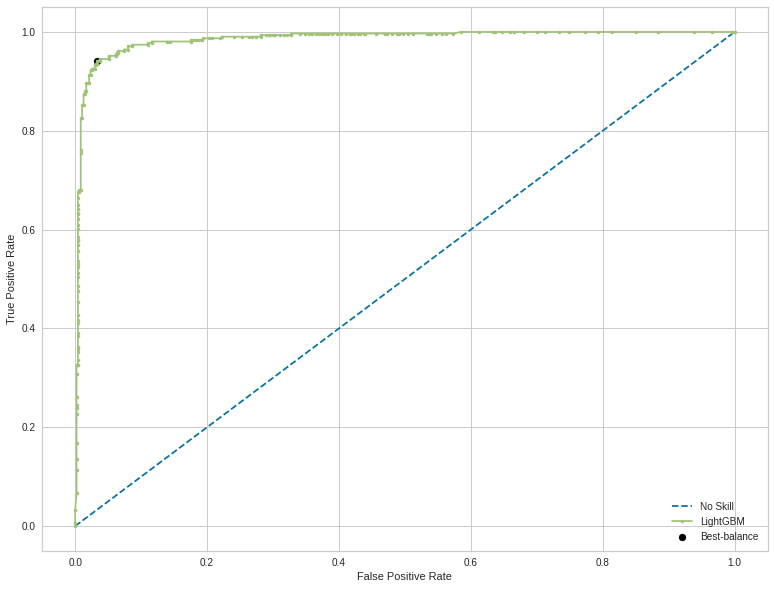

In [ ]:
## Get thresholds for gmax
# ROC Plot and score
fpr, tpr, thresholds = roc_curve(unseen_predictions.Y, unseen_predictions.Score1, pos_label=1)
# get gmeans
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

# get threshold when geometric mean is greatest.
roc_threshold = thresholds[ix]

# plot the roc curve for the model
fig, ax = plt.subplots(figsize=(13, 10))
ax.plot([0,1], [0,1], linestyle='--', label='No Skill')
ax.plot(fpr, tpr, marker='.', label='LightGBM')

# Add gmax value
ax.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best-balance')

# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

### Model performance analysis on validation set in terms of various risks
Model performance analysis on the validation set in terms of various risks

There are two major risks in any model training:
1.	Concept / Data drift: This is not applicable between training and validation datasets as we have randomly divided the training dataset into two datasets.

2.	Model Overfitting: 
This is a potential issue that we have to address. 
First of all, we separated the validation dataset at the early stage. Hence, there is no chance of data leakage. 
Next, we must be careful regarding any undesired drop in the model performance when we fine-tune the model and test in the validation dataset. A significant drop in performance will mean that we have an overfit model. 
In the current use case, we don’t have that issue as we case see (Table 1) the Recall, Precision, and F1 scores are comparable. There is a drop of around 0.04 in the AUC score that can be ignored for this assignment purpose. <br><br>Table 1: Summary of the evaluation metrics at different model training steps


| **Model / Stage**    | **Features**         | **Dataset**                        | **AUC** | **Recall** | **Precision** | **F1**   |
| -------------------- | -------------------- | ---------------------------------- | ------- | ---------- | ------------- | -------- |
| Out of box Lightgbm  | Informative features | Training<br>                            | 0.9869  | 0.9317     | 0.9382        | 0.9345   |
| Fine-tuned Lightgbm | Informative features | Training<br>                            | 0.9845  | 0.9306     | 0.9388        | 0.9344   |
| Lightgbm             | Reduced Features     | Training<br>                            | 0.9871  | 0.9398     | 0.9379        | 0.9383   |
| Fine-tuned Lightgbm | Reduced Features     | Training<br>                            | 0.9844  | 0.9237     | 0.9388        | 0.9306   |
| Fine-tuned Lightgbm | Reduced Features     | Holdout <br>(part of PyCaret Training) | 0.9821  | 0.9181     | 0.9312        | 0.9246   |
| Fine-tuned Lightgbm | Reduced Features     | Validation<br>                          | 0.9490  | 0.92556    | 0.9565        | 0.9407\` |

